In [88]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('report/EXP_benchmark_flash.csv')
df = df.sort_values(by=['prefill','input'])
df

,prefill,input,latency,repeat_time
52,1,1,0.024869,1000
59,1,2,0.025327,1000
66,1,4,0.025369,1000
72,1,8,0.025513,1000
79,1,16,0.025673,1000
...,...,...,...,...
231,60000,480,0.224322,1000
668,60000,488,0.225702,1000
571,60000,496,0.224863,1000
669,60000,504,0.226811,1000


[0.0248686909675598, 0.0252311496734619, 0.0249588396549224, 0.025900499343872, 0.0277191627025604, 0.0335218346118927, 0.0394927206039428, 0.0455117404460907, 0.0565393941402435, 0.0652184143066406]


ValueError: x and y must have same first dimension, but have shapes (36,) and (10,)

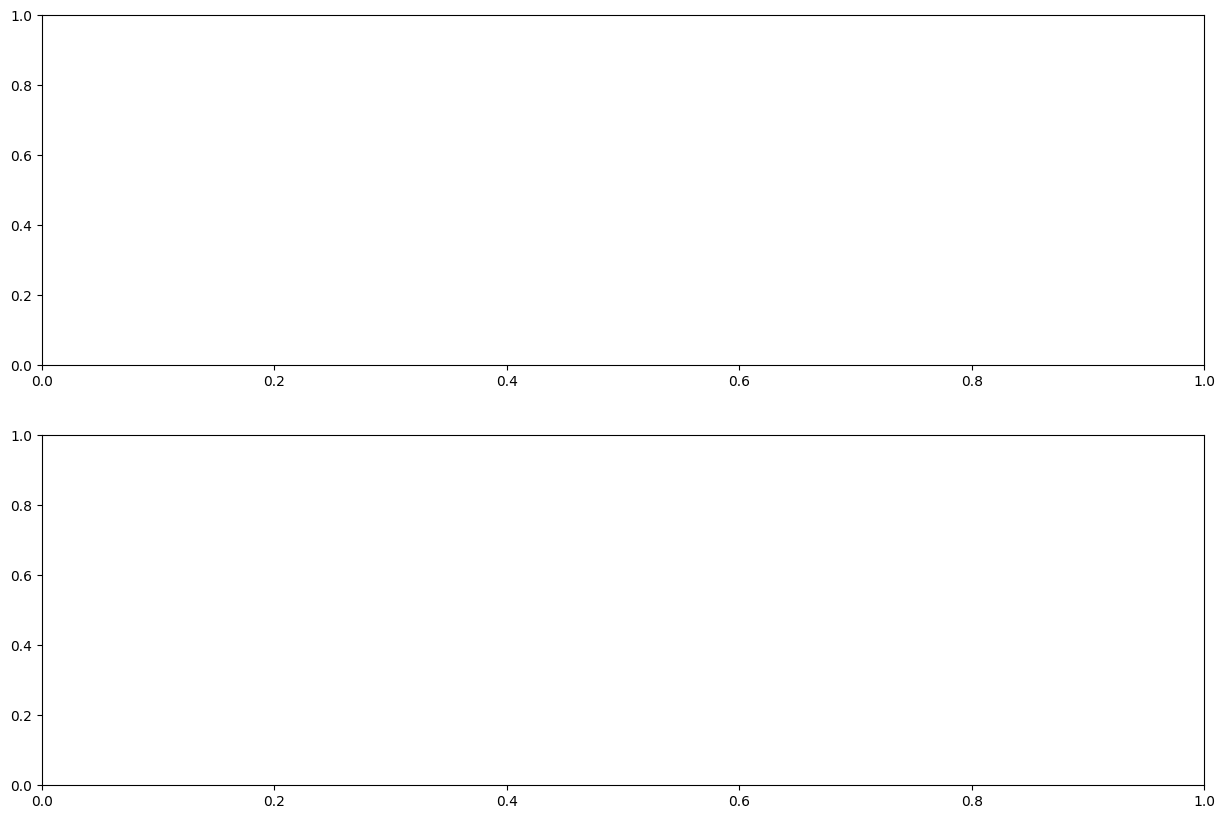

In [89]:
# Preparing data for plotting
x_list_prefill = df['prefill'].unique().tolist()
# x_list_input = df['input'].unique().tolist()
x_list_input = [1,2,4,8,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256,272,288,304,320,336,352,368,384,400,416,432,448,464,480,496,512]

# With Flash-Attn (varying 'input')
y_lists_flash = [df[df['input'] == input_value]['latency'].tolist() for input_value in x_list_input]

# With Flash-Attn (varying 'prefill')
y_lists_prefill_flash = [df[df['prefill'] == prefill]['latency'].tolist() for prefill in x_list_prefill]

# Creating subplots
fig, axs = plt.subplots(2, figsize=(15, 10))


# Plotting - With Flash-Attn (varying 'input')
for i, y_list in enumerate(y_lists_flash):
    print(y_list)
    axs[0].plot(x_list_input, y_list, label=f'input={2**i}', marker='o')
axs[0].set_title('With Flash-Attn (varying input)')
axs[0].legend()
axs[0].grid()

# Plotting - With Flash-Attn (varying 'prefill')
for i, y_list in enumerate(y_lists_prefill_flash):
    axs[1, 1].plot(x_list_prefill[:len(y_list)], y_list, label=f'prefill={[1, 1000, 2000, 4000, 8000, 16000, 32000, 50000][i]}', marker='o')
axs[1].set_title('With Flash-Attn (varying prefill)')
axs[1].legend()
axs[1].grid()

# Adjust layout
plt.tight_layout()

plt.show()


In [ ]:
# Preparing data for plotting
x_list_prefill = sorted(df['prefill'].unique().tolist())
x_list_input = [1,2,4,8,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256,272,288,304,320,336,352,368,384,400,416,432,448,464,480,496,512]

# With Flash-Attn (varying 'input')
y_lists_flash = [df[df['input'] == input_value]['latency'].tolist() for input_value in x_list_input]

# With Flash-Attn (varying 'prefill')
y_lists_prefill_flash = [df[df['prefill'] == prefill]['latency'].tolist() for prefill in x_list_prefill]

# Creating subplots
# fig, axs = plt.subplots(2, figsize=(15, 10))


# # Plotting - With Flash-Attn (varying 'input')
# for i, y_list in enumerate(y_lists_flash):
#     print(y_list)
#     axs[0].plot(x_list_input, y_list, label=f'input={2**i}', marker='o')
# axs[0].set_title('With Flash-Attn (varying input)')
# axs[0].legend()
# axs[0].grid()

# Plotting - With Flash-Attn (varying 'prefill')
# for i, y_list in enumerate(y_lists_flash):
#     print(y_list)
#     axs[1].plot(x_list_prefill, y_list, label=f'prefill={x_list_prefill[i]}', marker='o')
# axs[1].set_title('With Flash-Attn (varying prefill)')
# axs[1].legend()
# axs[1].grid()

# Adjust layout
plt.tight_layout()

plt.show()


<Figure size 640x480 with 0 Axes>

In [90]:
len(y_lists_prefill_flash)

10

In [91]:
x = [1,2,4,8,16,32,24,40,48,56,64,72,80,88,96,104,112,120,128,136,144,152,160,168,176,184,192,200,208,216,224,232,240,248,256,264,272,280,288,296,304,312,320,328,336,344,352,360,368,376,384,392,400,408,416,424,432,440,448,456,464,472,480,488,496,504,512]

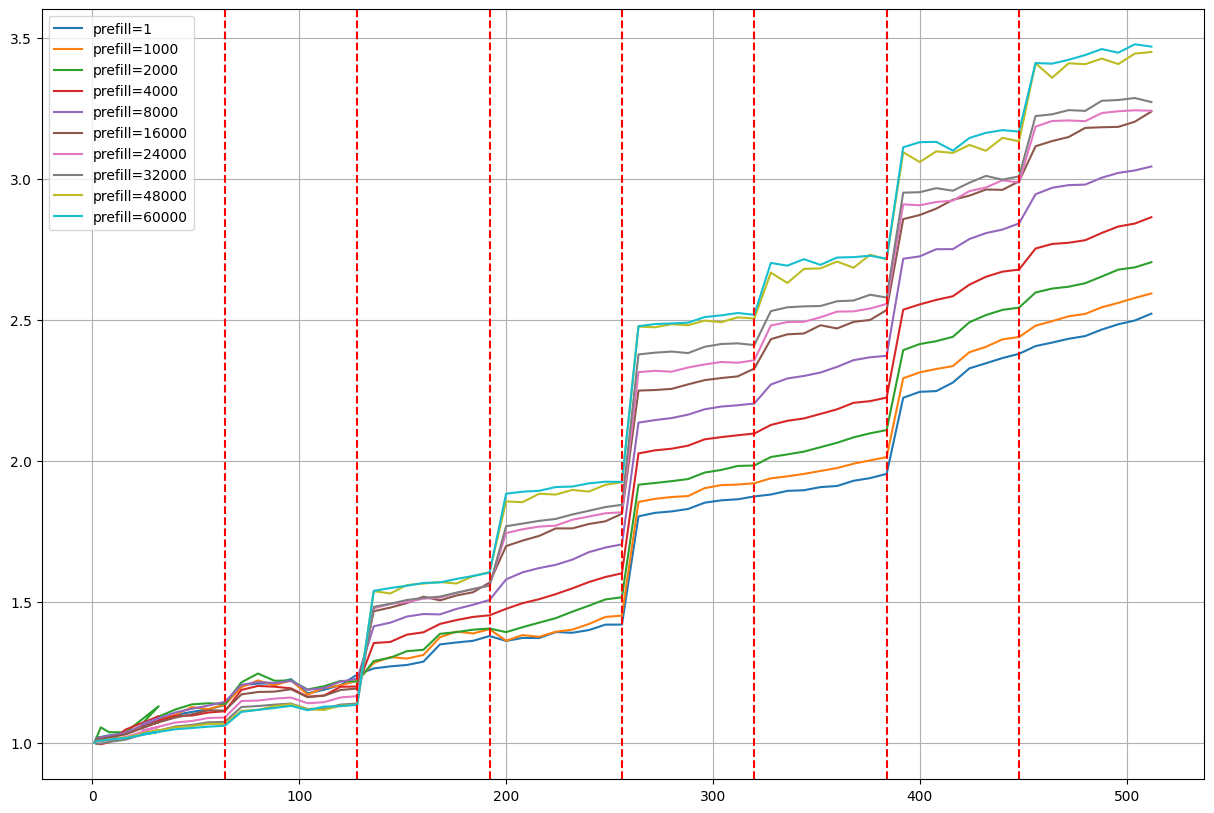

In [102]:
plt.figure(figsize=(15,10))
plt.grid()
prefill = [1, 1000, 2000, 4000, 8000, 16000, 24000, 32000, 48000, 60000]
x = [1,2,4,8,16,32,24,40,48,56,64,72,80,88,96,104,112,120,128,136,144,152,160,168,176,184,192,200,208,216,224,232,240,248,256,264,272,280,288,296,304,312,320,328,336,344,352,360,368,376,384,392,400,408,416,424,432,440,448,456,464,472,480,488,496,504,512]
k=0
for i in y_lists_prefill_flash:
    plt.plot(x,[m / i[0] for m in i], label=f'prefill={prefill[k]}')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

# plt.ylim(1)
# draw a vertical line at x = 128
plt.axvline(x=64, color='r', linestyle='--')
plt.axvline(x=128, color='r', linestyle='--')
plt.axvline(x=192, color='r', linestyle='--')
plt.axvline(x=256, color='r', linestyle='--')
plt.axvline(x=320, color='r', linestyle='--')
plt.axvline(x=384, color='r', linestyle='--')
plt.axvline(x=448, color='r', linestyle='--')
plt.legend()


In [115]:
kk=0
for i in y_lists_prefill_flash:
    k = [m / i[0] for m in i]
    for j in range(len(k)):
        if k[j] > 1.5:
            print(prefill[kk], x[j])
            break
    kk+=1

1 264
1000 264
2000 248
4000 216
8000 192
16000 160
24000 160
32000 152
48000 136
60000 136


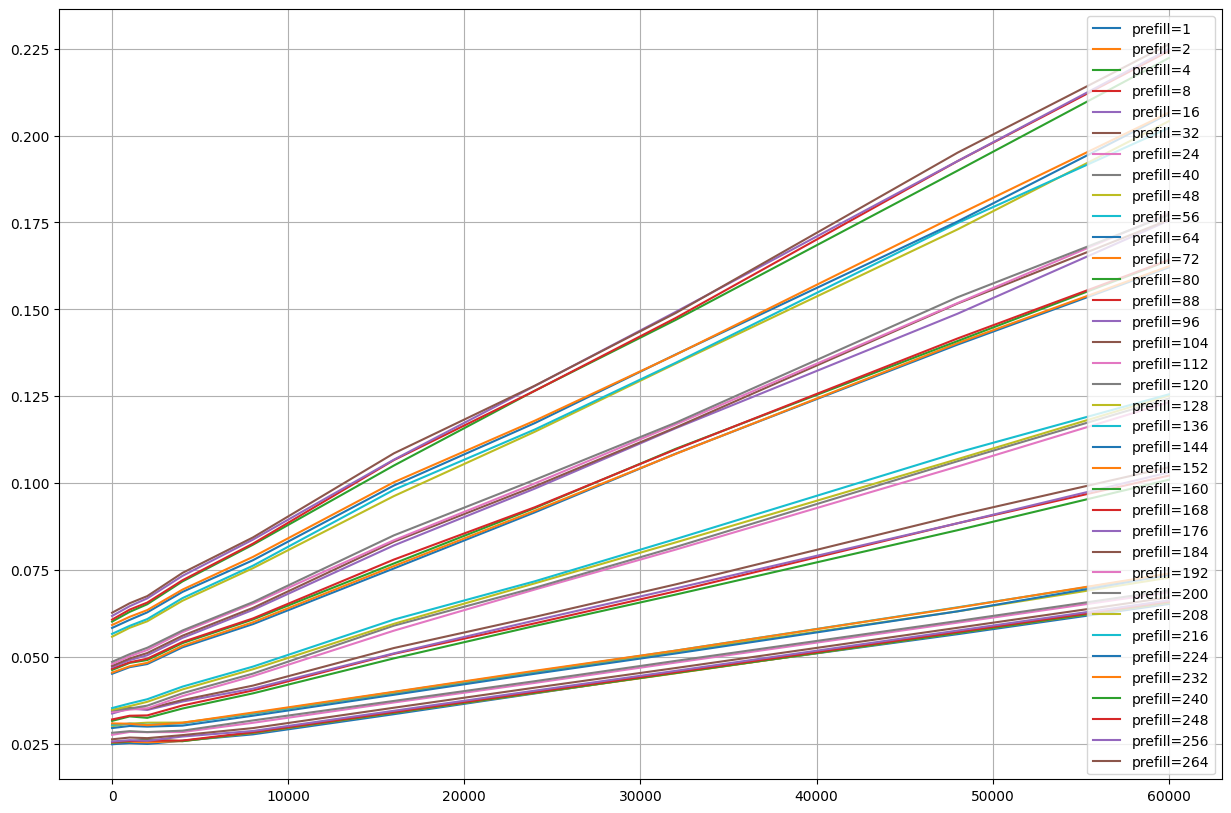

In [96]:
plt.figure(figsize=(15,10))
plt.grid()
prefill = [1, 1000, 2000, 4000, 8000, 16000, 24000, 32000, 48000, 60000]
x = [1,2,4,8,16,32,24,40,48,56,64,72,80,88,96,104,112,120,128,136,144,152,160,168,176,184,192,200,208,216,224,232,240,248,256,264,272,280,288,296,304,312,320,328,336,344,352,360,368,376,384,392,400,408,416,424,432,440,448,456,464,472,480,488,496,504,512]
k=0
for i in y_lists_flash:
    plt.plot(prefill,i, label=f'prefill={x[k]}')
    k+=1
plt.legend()

In [98]:
df[df['prefill'] == 1000]

,prefill,input,latency,repeat_time
46,1000,1,0.025231,1000
54,1000,2,0.025612,1000
62,1000,4,0.025692,1000
68,1000,8,0.025800,1000
74,1000,16,0.026054,1000
...,...,...,...,...
177,1000,480,0.063611,1000
540,1000,488,0.064203,1000
318,1000,496,0.064600,1000
547,1000,504,0.065039,1000
